# Adapted from CS109a Introduction to Data Science
## Seminar 8, Exercise 2: Classification using Decision Tree

## Description :
The goal of this exercise is to get comfortable using Decision Trees for classification in sklearn.

## Instructions:

- Read the train and test datafile as Pandas data frame.
- Use `minority` and `bachelor` as the predictor variables and `won` as the response.
- Fit a decision tree of depth 2 and another of depth 10 on the training data.
- Call the function `plot_boundary` to visualise the decision boundary of these 2 classifiers.
- Increase the number of predictor variables as mentioned in scaffold.
- Initialize a decision tree classifier of depth 2, 10 and 15.
- Fit the model on the train data.
- Compute the train and test accuracy scores for each classifier.
- Use the helper code to look at the feature importance of the predictors from the decision tree of depth 15.

## Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">sklearn.DecisionTreeClassifier()</a>
Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score" target="_blank">sklearn.score()</a>
Accuracy classification score.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit" target="_blank">classifier.fit()</a>
Build a decision tree classifier from the training set (X, y).

In [5]:
# !pip install prettytable

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
plt.rcParams["figure.figsize"] = (12,8)


In [17]:
import matplotlib.pyplot as plt
import numpy as np


def plot_boundary(elect_train, dt1, dt2):
    y_train = elect_train['won']
    x1_min, x1_max = elect_train['minority'].min() - 1, elect_train['minority'].max() + 1
    x2_min, x2_max = elect_train['bachelor'].min() - 1, elect_train['bachelor'].max() + 1
    x1x, x2x = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                           np.arange(x2_min, x2_max, 0.1))

    yhat2 = dt1.predict(np.c_[x1x.ravel(), x2x.ravel()]).reshape(x1x.shape)
    yhat10 = dt2.predict(np.c_[x1x.ravel(), x2x.ravel()]).reshape(x1x.shape)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 6])

    ax1.contourf(x1x, x2x, yhat2, alpha=0.2, cmap="PiYG");
    ax1.scatter(elect_train['minority'][y_train == 1], elect_train['bachelor'][y_train == 1], marker=".", color="#FF0B04",
                label="Trump")
    ax1.scatter(elect_train['minority'][y_train == 0], elect_train['bachelor'][y_train == 0], marker=".",
                color="#4374B3", label="Clinton")

    ax1.set_xlabel("minority")
    ax1.set_ylabel("bachelor")
    ax1.set_title("Decision Tree with max_depth=2")
    ax1.legend()

    ax2.contourf(x1x, x2x, yhat10, alpha=0.2, cmap="PiYG");
    ax2.scatter(elect_train['minority'][y_train == 1], elect_train['bachelor'][y_train == 1], marker=".", color="#FF0B04",
                label="Trump")
    ax2.scatter(elect_train['minority'][y_train == 0], elect_train['bachelor'][y_train == 0], marker=".",
                color="#4374B3", label="Clinton")

    ax2.set_xlabel("minority")
    ax2.set_ylabel("bachelor")
    ax2.set_title("Decision Tree with max_depth=10")
    ax2.legend()
    plt.show()

In [8]:
# Read the datafile "county_level_election.csv" as a Pandas dataframe
data = pd.read_csv("C:\\Users\\wirze\\DataspellProjects\\DS_DAPS\\8-lab\\data\\county_level_election.csv")
# split in into test and train
elect_train, elect_test = train_test_split(data)

# Take a quick look at the dataframe
elect_train.head()
elect_test.head()

,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
887,Wisconsin,55117,Sheboygan County,114560,6.161,9.394,49.779,3.8,55335,9.3,22.5,20.1,29.4,225.9,200.2,16.696,55.529,38.833
1499,Kansas,20187,Stanton County,2107,36.921,5.116,49.469,3.0,56591,20.0,17.9,32.6,31.3,5.6,228.4,60.377,78.167,17.790
1735,Kansas,20115,Marion County,11982,3.181,4.065,49.955,3.9,47723,11.2,22.6,26.3,30.9,32.5,238.6,50.339,71.876,21.537
918,Missouri,29097,Jasper County,118179,7.891,8.998,51.151,4.2,40047,14.7,21.0,28.6,34.5,1115.3,201.6,50.838,72.766,21.929
2516,Ohio,39113,Montgomery County,532562,2.662,26.173,51.882,5.0,42994,11.4,24.8,24.8,33.3,32.1,276.4,1.244,48.392,47.147


In [12]:
# Set the columns minority and bachelor as train data predictors
X_train = elect_train[['minority', 'bachelor']]

# Set the columns minority and bachelor as test data predictors
X_test = elect_test[['minority', 'bachelor']]

# Set the column "won" as the train response variable
elect_train['won'] = elect_train['trump'] > elect_train['clinton']
y_train = elect_train['won']

# Set the column "won" as the test response variable
elect_test['won'] = elect_test['trump'] > elect_test['clinton']
y_test = elect_test['won']


In [13]:
random_state = 42
# Initialize a Decision Tree classifier with a depth of 2
dt1 = DecisionTreeClassifier(random_state=random_state, max_depth=2)

# Fit the classifier on the train data
dt1.fit(X_train, y_train)

# Initialize a Decision Tree classifier with a depth of 10
dt2 = DecisionTreeClassifier(random_state=random_state, max_depth=10)

# Fit the classifier on the train data
dt2.fit(X_train, y_train)




DecisionTreeClassifier(max_depth=10, random_state=42)

C:\Users\wirze\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\wirze\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


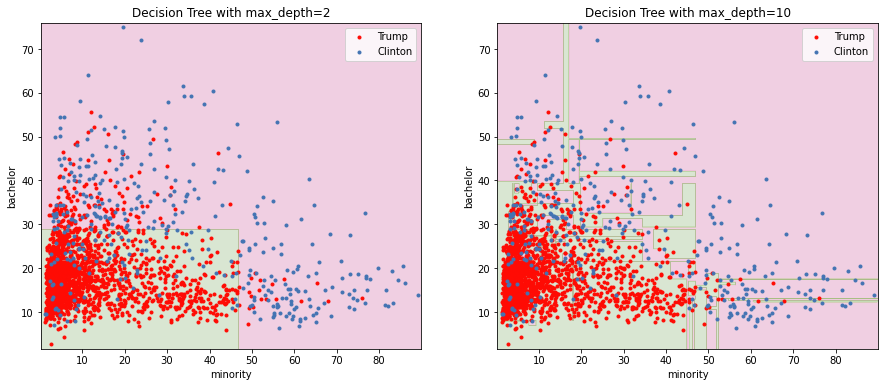

In [18]:
# Call the function plot_boundary from the helper file to get
# the decision boundaries of both the classifiers
plot_boundary(elect_train, dt1, dt2)


In [19]:
# Set of predictor columns
pred_cols = ['minority', 'density','hispanic','obesity','female','income','bachelor','inactivity']

# Use the columns above as the predictor data from the train data
X_train = elect_train[pred_cols]

# Use the columns above as the predictor data from the test data
X_test = elect_test[pred_cols]

# Initialize a Decision Tree classifier with a depth of 2
dt1 = DecisionTreeClassifier(max_depth=2)

# Initialize a Decision Tree classifier with a depth of 10
dt2 = DecisionTreeClassifier(max_depth=10)

# Initialize a Decision Tree classifier with a depth of 15
dt3 = DecisionTreeClassifier(max_depth=15)

# Fit all the classifier on the train data
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt3.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15)

In [21]:
# Compute the train and test accuracy for the first decision tree classifier of depth 2
dt1_train_acc = dt1.score(X_train, y_train)
dt1_test_acc = dt1.score(X_test, y_test)

# Compute the train and test accuracy for the second decision tree classifier of depth 10
dt2_train_acc = dt2.score(X_train, y_train)
dt2_test_acc = dt2.score(X_test, y_test)

# Compute the train and test accuracy for the third decision tree classifier of depth 15
dt3_train_acc = dt3.score(X_train, y_train)
dt3_test_acc = dt3.score(X_test, y_test)


In [22]:
# Helper code to plot the scores of each classifier as a table
pt = PrettyTable()
pt.field_names = ['Max Depth', 'Number of Features', 'Train Accuracy', 'Test Accuracy']
pt.add_row([2, 2, round(dt1_train_acc, 4), round(dt1_test_acc,4)])
pt.add_row([10, 2, round(dt2_train_acc,4), round(dt2_test_acc,4)])
pt.add_row([15, len(pred_cols), round(dt3_train_acc,4), round(dt3_test_acc,4)])
print(pt)


+-----------+--------------------+----------------+---------------+
| Max Depth | Number of Features | Train Accuracy | Test Accuracy |
+-----------+--------------------+----------------+---------------+
|     2     |         2          |     0.8886     |     0.8774    |
|     10    |         2          |     0.9891     |     0.9035    |
|     15    |         8          |     0.9996     |     0.8931    |
+-----------+--------------------+----------------+---------------+
